### Titanic Survival Prediction Analysis

The Titanic disaster is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, claiming over 1,500 lives. This tragic event has led to a great deal of historical interest and analysis, not least of which is the prediction of survival among the passengers based on available data.

This analysis leverages machine learning techniques to predict the likelihood of survival of passengers based on several input features such as sex, age, fare, passenger class, and family relationships aboard the ship. The dataset used in this study is split into a training set and a test set, which includes passenger details that are modeled to predict survival outcomes.

#### Dataset Description

The dataset consists of multiple features that describe each passenger aboard the Titanic:

- Passenger Class: Socio-economic status (Upper, Middle, Lower)
- Sex: Male or Female
- Age: Age of the passengers
- Siblings/Spouses Aboard: Number of siblings or spouses aboard the Titanic
- Parents/Children Aboard: Number of parents or children aboard the Titanic
- Fare: Passenger fare
- Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### Methodology

The project involves several key steps:

- Initial data is processed to handle missing values and convert categorical data into a suitable numeric format for modeling. Features like age, fare, and embarked are imputed and encoded appropriately.
- Exploratory Data Analysis (EDA): This step includes visualizing data distributions and survival rates across different groups to identify potential factors influencing survival.
- Feature Engineering: New features such as 'FamilySize' and 'IsAlone' are derived from existing data to provide more insights into the passenger's family aboard the Titanic.
- Model Building: Several machine learning models, including Logistic Regression, Support Vector Machines, Random Forest, Gradient Boosting, and XGBoost are trained to predict survival. These models are evaluated and tuned to enhance performance.
- Model Selection and Evaluation: The models are assessed based on accuracy and other metrics to select the best predictor of survival. Cross-validation is used extensively to ensure that the models generalize well on unseen data.
- Model Deployment: The best-performing model is deployed using Streamlit, creating an interactive web application that allows users to input passenger details and receive predictions on survival.

#### Objective

The primary goal of this analysis is not just to predict survival, but to understand the underlying factors that significantly influenced survival chances during this historical event. By applying machine learning techniques, we aim to draw meaningful insights and showcase the potential of data science in historical data analysis.

### Loading and Exploring the dataset

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
# Read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training data and the test data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Display basic information about the datasets
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check for missing values
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

train_missing, test_missing 

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [6]:
# Rename the columns
train_df = train_df.rename(columns={'survided': 'Survived', 
                                    'SibSp': 'Siblings/Spouses Aboard', 
                                    'Parch': 'Parents/Children Aboard',
                                    'Pclass': 'Passenger Class',
                                    })

test_df = test_df.rename(columns={'SibSp': 'Siblings/Spouses Aboard',
                                    'Parch': 'Parents/Children Aboard',
                                    'Pclass': 'Passenger Class',
                                    })

In [7]:
# Separating Passenger Class into three categories (upper, middle, lower) column-wise
train_df = pd.get_dummies(train_df, columns=['Passenger Class'])
test_df = pd.get_dummies(test_df, columns=['Passenger Class'])

# Inspect the columns
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age',
       'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Passenger Class_1', 'Passenger Class_2',
       'Passenger Class_3'],
      dtype='object')
Index(['PassengerId', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'Passenger Class_1', 'Passenger Class_2', 'Passenger Class_3'],
      dtype='object')


In [8]:
# Handle missing values

# Create imputers for the Age and Fare columns using median
imputer_age = SimpleImputer(strategy='median')
imputer_fare = SimpleImputer(strategy='median')

# Apply the imputers to the respective columns in both train and test sets
train_df['Age'] = imputer_age.fit_transform(train_df[['Age']])
test_df['Age'] = imputer_age.transform(test_df[['Age']])
test_df['Fare'] = imputer_fare.fit_transform(test_df[['Fare']])

# For the Embarked column, we use the most frequent value to fill in missing values in the training set
imputer_embarked = SimpleImputer(strategy='most_frequent')
train_df['Embarked'] = imputer_embarked.fit_transform(train_df[['Embarked']]).ravel()

# Dropping cabin column
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

# Check for missing values again
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

train_missing, test_missing

(PassengerId                0
 Survived                   0
 Name                       0
 Sex                        0
 Age                        0
 Siblings/Spouses Aboard    0
 Parents/Children Aboard    0
 Ticket                     0
 Fare                       0
 Embarked                   0
 Passenger Class_1          0
 Passenger Class_2          0
 Passenger Class_3          0
 dtype: int64,
 PassengerId                0
 Name                       0
 Sex                        0
 Age                        0
 Siblings/Spouses Aboard    0
 Parents/Children Aboard    0
 Ticket                     0
 Fare                       0
 Embarked                   0
 Passenger Class_1          0
 Passenger Class_2          0
 Passenger Class_3          0
 dtype: int64)

### Exploratory Data Analysis (EDA)

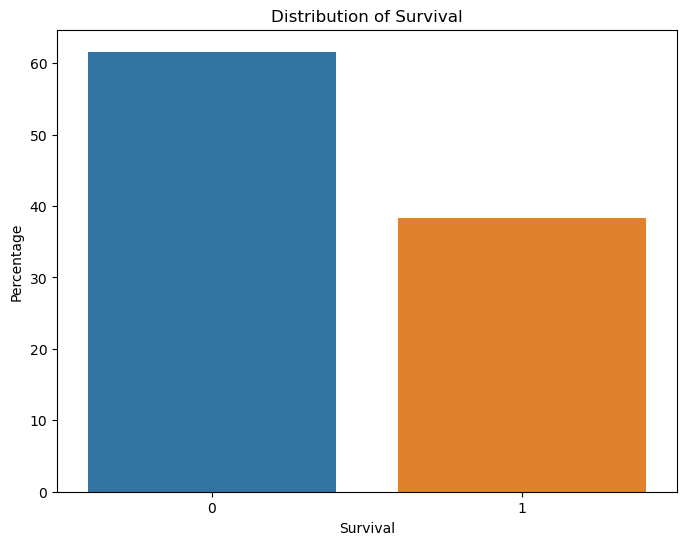

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [9]:
# Let's start with distribution of survival
survival_counts = train_df['Survived'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title('Distribution of Survival')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

survival_counts

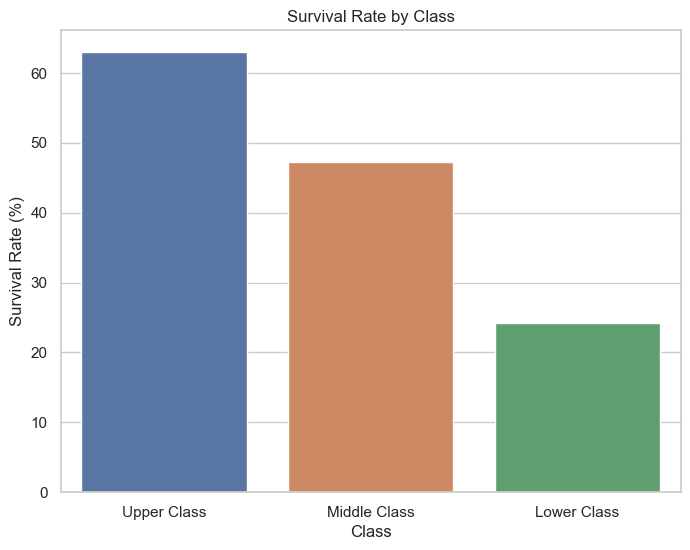

In [10]:
# Calculate the survival rate for each class
survival_rates = {
    'Upper Class': train_df['Survived'][train_df['Passenger Class_1'] == 1].mean() * 100,
    'Middle Class': train_df['Survived'][train_df['Passenger Class_2'] == 1].mean() * 100,
    'Lower Class': train_df['Survived'][train_df['Passenger Class_3'] == 1].mean() * 100
}

# Prepare data for plotting
classes = list(survival_rates.keys())
rates = list(survival_rates.values())

# Plot the survival rate by class
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(x=classes, y=rates)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate (%)')
plt.show()

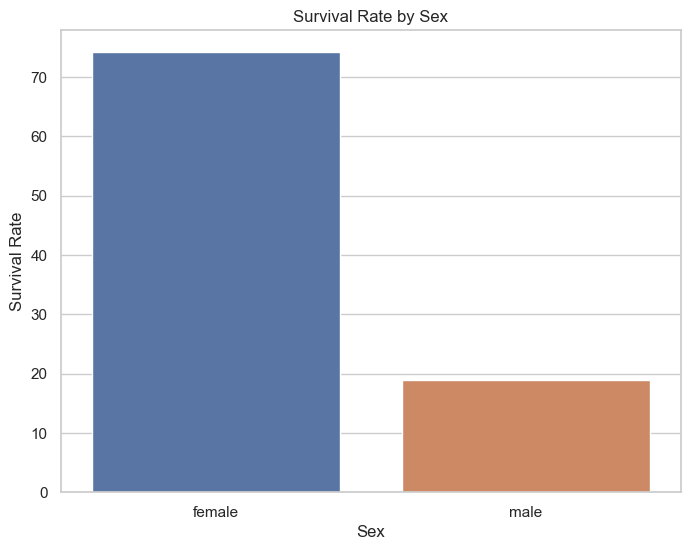

,Survived
Sex,
female,74.203822
male,18.890815


In [11]:
# Survival rate by sex
survival_by_sex = train_df.pivot_table('Survived', index='Sex', aggfunc='mean') * 100

# Plot
sns.set_theme(style='whitegrid')

plt.figure(figsize=(8, 6))
sns.barplot(x = survival_by_sex.index, y = survival_by_sex.values.ravel())
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

survival_by_sex

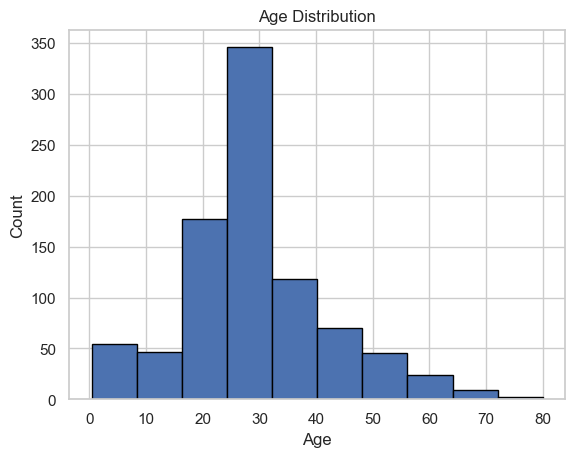

In [12]:
# Distribution of age with a histogram
fig_age, ax_age = plt.subplots()
train_df['Age'].plot(kind='hist', edgecolor='black', ax=ax_age)
ax_age.set_title('Age Distribution')
ax_age.set_xlabel('Age')
ax_age.set_ylabel('Count')
plt.show()

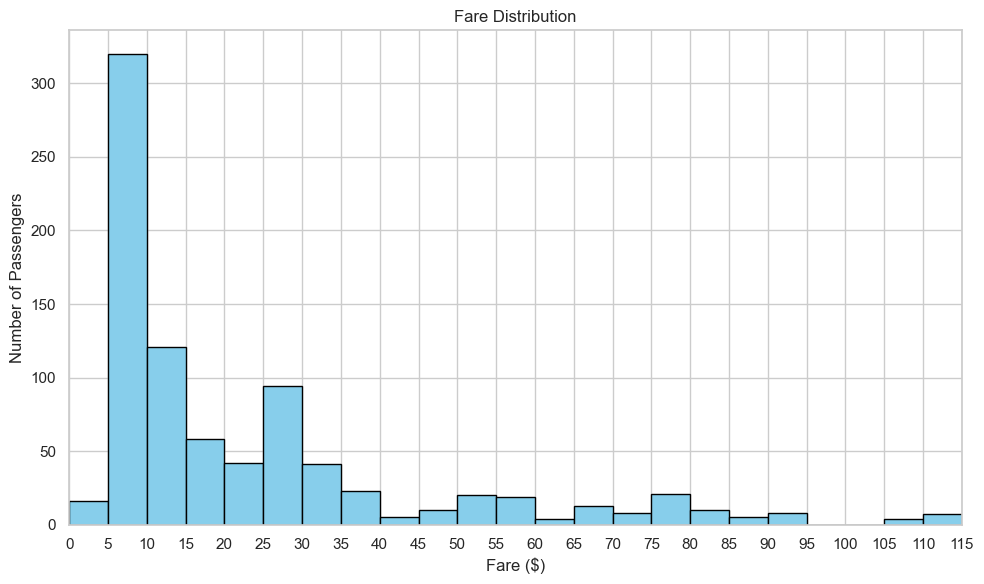

In [13]:
# Distribution of fare with a histogram

bin_size = 5  # You can adjust this to change the granularity
bins = range(0, int(train_df['Fare'].quantile(0.95)) + bin_size, bin_size)

# Distribution of fare with a histogram
fig_fare, ax_fare = plt.subplots(figsize=(10, 6))  # Increase the figure size for better visibility
train_df['Fare'].plot(kind='hist', bins=bins, color='skyblue', edgecolor='black', ax=ax_fare)
ax_fare.set_title('Fare Distribution')
ax_fare.set_xlabel('Fare ($)')
ax_fare.set_ylabel('Number of Passengers')
ax_fare.grid(True)  # Adding grid lines for better readability
ax_fare.set_xlim(0, train_df['Fare'].quantile(0.95))  # Limiting to 95th percentile for better visualization

# Enhance plot aesthetics
plt.xticks(bins)  # Set x-ticks to match the bins
plt.tight_layout()  # Adjust subplot params to give specified padding.
plt.show()

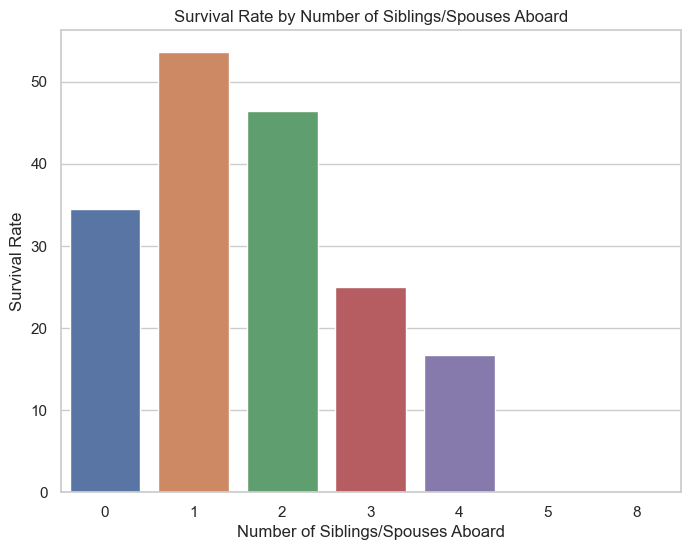

,Survived
Siblings/Spouses Aboard,
0,34.539474
1,53.588517
2,46.428571
3,25.000000
4,16.666667
5,0.000000
8,0.000000


In [14]:
# Survival rate by number of siblings/spouses aboard
survival_by_sibsp = train_df.pivot_table('Survived', index='Siblings/Spouses Aboard', aggfunc='mean') * 100

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_sibsp.index, y=survival_by_sibsp.values.ravel())
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()

survival_by_sibsp

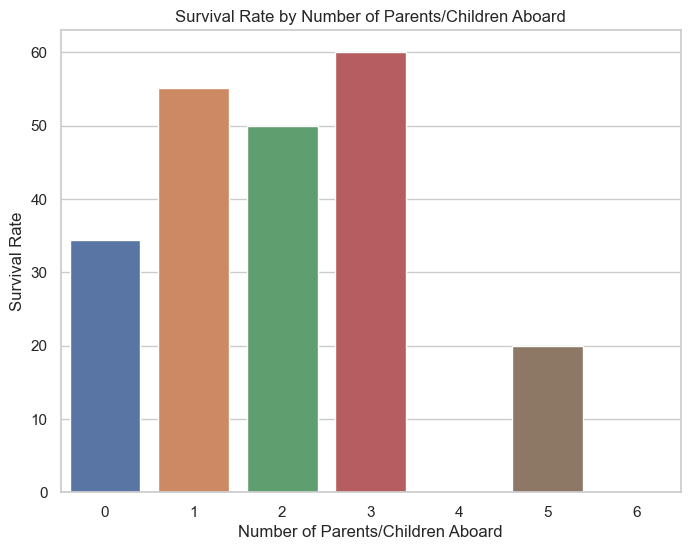

,Survived
Parents/Children Aboard,
0,34.365782
1,55.084746
2,50.000000
3,60.000000
4,0.000000
5,20.000000
6,0.000000


In [15]:
# Survival rate by number of parents/children aboard
survival_by_parch = train_df.pivot_table('Survived', index='Parents/Children Aboard', aggfunc='mean') * 100

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_parch.index, y=survival_by_parch.values.ravel())
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.show()

survival_by_parch

Survival Distribution
- Approximately 61.6% of passengers in the training set did not survive, while about 38.4% survived.

Survival Rate by Class
- First-class passengers had the highest survival rate at approximately 63.0%.
- Second-class passengers had a survival rate of about 47.3%.
- Third-class passengers had the lowest survival rate at approximately 24.2%.

Survival Rate by Sex
- Female passengers had a much higher survival rate (74.2%) compared to male passengers (18.9%).

Age Distribution
- The age distribution is slightly right-skewed, indicating a younger passenger demographic aboard the Titanic. The majority of passengers are between 20 and 40 years old.

Fare Distribution
- The fare distribution is highly skewed, with most passengers paying low fares. The distribution is cut off at the 95th percentile for better visualization, which shows that most fares are below £50.

Survival Rate by Siblings/Spouses Aboard (SibSp)
- Passengers with one sibling/spouse aboard had a higher survival rate (53.6%) compared to those with none (34.5%).
- Survival rates drop significantly for passengers with four or more siblings/spouses aboard.

Survival Rate by Parents/Children Aboard (Parch)
- Passengers with one, two, or three family members (either parents or children) aboard had higher survival rates (55.1%, 50.0%, and 60.0%, respectively).
- Similar to the SibSp analysis, survival rates are very low for passengers with four or more family members aboard.

#### Feature Engineering

In [16]:
# Create a new feature 'FamilySize' which is the sum of 'SibSp' + 'Parch' + 1 (the passenger themselves)
train_df['FamilySize'] = train_df['Siblings/Spouses Aboard'] + train_df['Parents/Children Aboard'] + 1
test_df['FamilySize'] = test_df['Siblings/Spouses Aboard'] + test_df['Parents/Children Aboard'] + 1

# Create a binary feature 'IsAlone' for passengers that travelled alone
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

# Encoding 'Sex' as a binary feature (0 = male, 1 = female) for model training purposes
train_df['Sex'] = (train_df['Sex'] == 'female').astype(int)
test_df['Sex'] = (test_df['Sex'] == 'female').astype(int)

# Encoding 'Embarked' as one-hot encoded features
train_df = pd.get_dummies(train_df, columns=['Embarked'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])

# Converting Embarked_C, Embarked_Q, and Embarked_S to integers
def convert_to_int(df, col):
    df[col] = df[col].astype(int)
    return df

# Usage
columns_to_convert = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
train_df = convert_to_int(train_df, columns_to_convert)
test_df = convert_to_int(test_df, columns_to_convert)

# Now let's review the new features and the one-hot encoded 'Embarked' feature
train_df.head()

,PassengerId,Survived,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Ticket,Fare,Passenger Class_1,Passenger Class_2,Passenger Class_3,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True,2,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False,2,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,True,False,False,2,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True,1,1,0,0,1


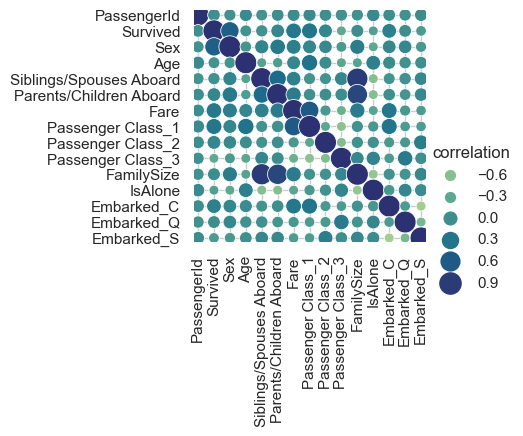

In [17]:
# Selecting numerical features for correlation analysis
train_df_num = train_df.select_dtypes(include=['int64', 'float64', 'bool', 'int32'])

corr_matrix = train_df_num.corr().stack().reset_index(name='correlation')

g = sns.relplot(
    data=corr_matrix,
    x='level_0', y='level_1', hue='correlation', size='correlation',
    palette='crest', sizes=(50, 250), size_norm=(-0.2, 1),
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

In [18]:
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age',
       'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Ticket', 'Fare',
       'Passenger Class_1', 'Passenger Class_2', 'Passenger Class_3',
       'FamilySize', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Ticket', 'Fare', 'Passenger Class_1',
       'Passenger Class_2', 'Passenger Class_3', 'FamilySize', 'IsAlone',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


#### Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Preparing the feature vector and target variable
X = train_df[['Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Passenger Class_1', 'Passenger Class_2', 'Passenger Class_3']]
y = train_df['Survived']

# Splitting the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_validation = logreg_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_pred_validation)

# Print out the classification report for further evaluation metrics
classification_rep = classification_report(y_validation, y_pred_validation)

print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'\nClassification Report:\n{classification_rep}')

Validation Accuracy: 79.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



##### Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types to try
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Range of values for the regularization hyperparameter
    'solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Initialize the GridSearchCV object with the logistic regression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print(f'Best Parameters: {best_parameters}')
print(f'Best Cross-Validation Score: {best_score * 100:.2f}%')

# Retrieve the best model from the grid search
best_logreg_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred_validation = best_logreg_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_pred_validation)

# Print out the classification report for further evaluation metrics
classification_rep = classification_report(y_validation, y_pred_validation)

print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'\nClassification Report:\n{classification_rep}')

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 80.61%
Validation Accuracy: 79.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Support Vector Machine (SVM)

In [21]:
# Initialize a Random Forest and a Support Vector Machine classifier
svm_model = SVC(gamma='auto', random_state=42)

# Train and evaluate the Support Vector Machine classifier using cross-validation
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
svm_cv_accuracy = svm_cv_scores.mean()

# Classification report
classification_svm = classification_report(y_validation, y_pred_validation)


print(f'Validation Accuracy: {svm_cv_accuracy * 100:.2f}%')
print(f'\nClassification Report:\n{classification_svm}')

Validation Accuracy: 68.40%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



##### Hyperparameter Tuning

In [22]:

# Set up the parameter grid for SVM
svm_param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf']
}  

# Initialize the Grid Search model
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
svm_grid_search.fit(X_train, y_train)

# Best parameters and best score for SVM
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

# Retrieve the best model from the grid search for SVM and predict on the validation set
best_svm_model = svm_grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred_validation = best_svm_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_pred_validation)

# Print out the classification report for further evaluation metrics
classification_rep = classification_report(y_validation, y_pred_validation)

print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'\nClassification Report:\n{classification_rep}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Validation Accuracy: 78.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



#### Random Forest

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
rf_cv_accuracy = rf_cv_scores.mean()

# Classification report
classification_rf = classification_report(y_validation, y_pred_validation)

print(f'Validation Accuracy: {rf_cv_accuracy * 100:.2f}%')
print(f'\nClassification Report:\n{classification_rf}')

Validation Accuracy: 78.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



##### Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8],
    'criterion' :['gini', 'entropy']
}

# Initialize the Grid Search model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score for Random Forest
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

# Retrieve the best model from the grid search for Random Forest and predict on the validation set
best_rf_model = rf_grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred_validation = best_rf_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_pred_validation)

# Print out the classification report for further evaluation metrics
classification_rep = classification_report(y_validation, y_pred_validation)

print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'\nClassification Report:\n{classification_rep}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Validation Accuracy: 82.12%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



#### Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_validation_gb = gb_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy_gb = accuracy_score(y_validation, y_pred_validation_gb)

# Print out the classification report for further evaluation metrics
classification_rep_gb = classification_report(y_validation, y_pred_validation_gb)

print(f'Validation Accuracy for Gradient Boosting: {validation_accuracy_gb * 100:.2f}%')
print(f'\nClassification Report for Gradient Boosting:\n{classification_rep_gb}')

Validation Accuracy for Gradient Boosting: 81.56%

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



##### Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter grid to search
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 4, 6]
}

# Initialize the GridSearchCV object with Gradient Boosting Classifier and parameter grid
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state = 42), param_grid_gb, cv = 5, scoring='accuracy')
 
# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and score
best_parameters_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Retrieve the best model from the grid search for Gradient Boosting and predict on the validation set
best_gb_model = grid_search_gb.best_estimator_

# Predict on the validation set using the best model
y_pred_validation = best_gb_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_pred_validation)

# Print out the classification report for further evaluation metrics
classification_rep = classification_report(y_validation, y_pred_validation)

print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'\nClassification Report:\n{classification_rep}')

#### XGBoost

In [ ]:
import xgboost as xgb

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_validation_xgb = xgb_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy_xgb = accuracy_score(y_validation, y_pred_validation_xgb)

# Print out the classification report for further evaluation metrics
classification_rep_xgb = classification_report(y_validation, y_pred_validation_xgb)

print(f'Validation Accuracy for XGBoost: {validation_accuracy_xgb * 100:.2f}%')
print(f'\nClassification Report for XGBoost:\n{classification_rep_xgb}')

Validation Accuracy for XGBoost: 81.01%

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



##### Hyperparameter Tuning

In [ ]:
import xgboost as xgb

# Define the hyperparameter grid to search
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the GridSearchCV object with XGBoost Classifier and parameter grid
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and score
best_parameters_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

# Retrieve the best model from the grid search for XGBoost and predict on the validation set
best_xgb_model = grid_search_xgb.best_estimator_

# Predict on the validation set using the best model
y_pred_validation = best_xgb_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_pred_validation)

# Print out the classification report for further evaluation metrics
classification_rep = classification_report(y_validation, y_pred_validation)

print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')
print(f'\nClassification Report:\n{classification_rep}')

Validation Accuracy: 82.12%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



#### Predictions

In [ ]:
# Best model
# Dictionary of the models and their validation accuracies
models = {
    'Logistic Regression': best_logreg_model,
    'Support Vector Machine': best_svm_model,
    'Random Forest': best_rf_model,
    'Gradient Boosting': best_gb_model,
    'XGBoost': best_xgb_model
}

print('Validation Accuracy Scores:')
# Function to calculate the validation accuracy for each model
def calculate_accuracy(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# Calculate the validation accuracy for each model
for model_name, model in models.items():
    accuracy = calculate_accuracy(model, X_validation, y_validation)
    print(f'{model_name}: {accuracy * 100:.2f}%')

print('Cross-Validation Accuracy Scores:')
# Function to calculate the cross-validation accuracy for each model
def calculate_cv_accuracy(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5)
    cv_accuracy = cv_scores.mean()
    return cv_accuracy

# Calculate the cross-validation accuracy for each model
for model_name, model in models.items():
    cv_accuracy = calculate_cv_accuracy(model, X_train, y_train)
    print(f'{model_name}: {cv_accuracy * 100:.2f}%')
    

Validation Accuracy Scores:
Logistic Regression: 79.89%
Support Vector Machine: 78.21%
Random Forest: 82.12%
Gradient Boosting: 82.68%
XGBoost: 82.12%
Cross-Validation Accuracy Scores:
Logistic Regression: 80.61%


Support Vector Machine: 79.49%
Random Forest: 82.58%
Gradient Boosting: 83.57%
XGBoost: 84.27%


XGBoost has the highest cross-validation score at 84.27%. Cross-validation scores are generally more reliable because they are based on multiple rounds of training and validation, which tends to reduce bias and variance in the model's performance estimate.

Gradient Boosting comes next with a cross-validation score of 83.57% and the highest validation accuracy at 82.68%. The fact that Gradient Boosting performs well on both metrics suggests it is a strong model.

Random Forest has a similar performance in both validation accuracy and cross-validation scores, which indicates consistency.

Both Logistic Regression and Support Vector Machine models show an increase in cross-validation scores compared to validation accuracy, which might suggest that these models are less sensitive to the particular split of data.

__XGBoost__ would be the best choice due to its highest cross-validation score, which indicates it may generalize better to unseen data.

In [ ]:
# Export the predictions to a CSV file
passenger_ids = test_df['PassengerId']

test_df = test_df[['Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Passenger Class_1', 'Passenger Class_2', 'Passenger Class_3']]

test_df_predictions = best_xgb_model.predict(test_df)

# Add 'PassengerId' column to the test set predictions
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': test_df_predictions})

output.to_csv('my_submission.csv', index = False)

#### Streamlit App - Model Deployment

In [ ]:
# Save the model to a file

joblib.dump(best_xgb_model, 'titanic_model.pkl')

['titanic_model.pkl']